![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [2473]:
import numpy as np
import pandas as pd

In [2474]:
Churn = pd.read_csv("/content/Churn_Modelling.csv")


In [2475]:
# Visualização do começo do dataframe

Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3.2 Preparação e limpeza dos dados

In [2476]:
# Informações do dataframe e descrição mais detalhada

Churn.info()

Churn.describe(include='all') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [2477]:
# Linhas duplicadas

duplicados = Churn[Churn.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [2478]:
Churn.drop_duplicates(keep='first', inplace=True) 

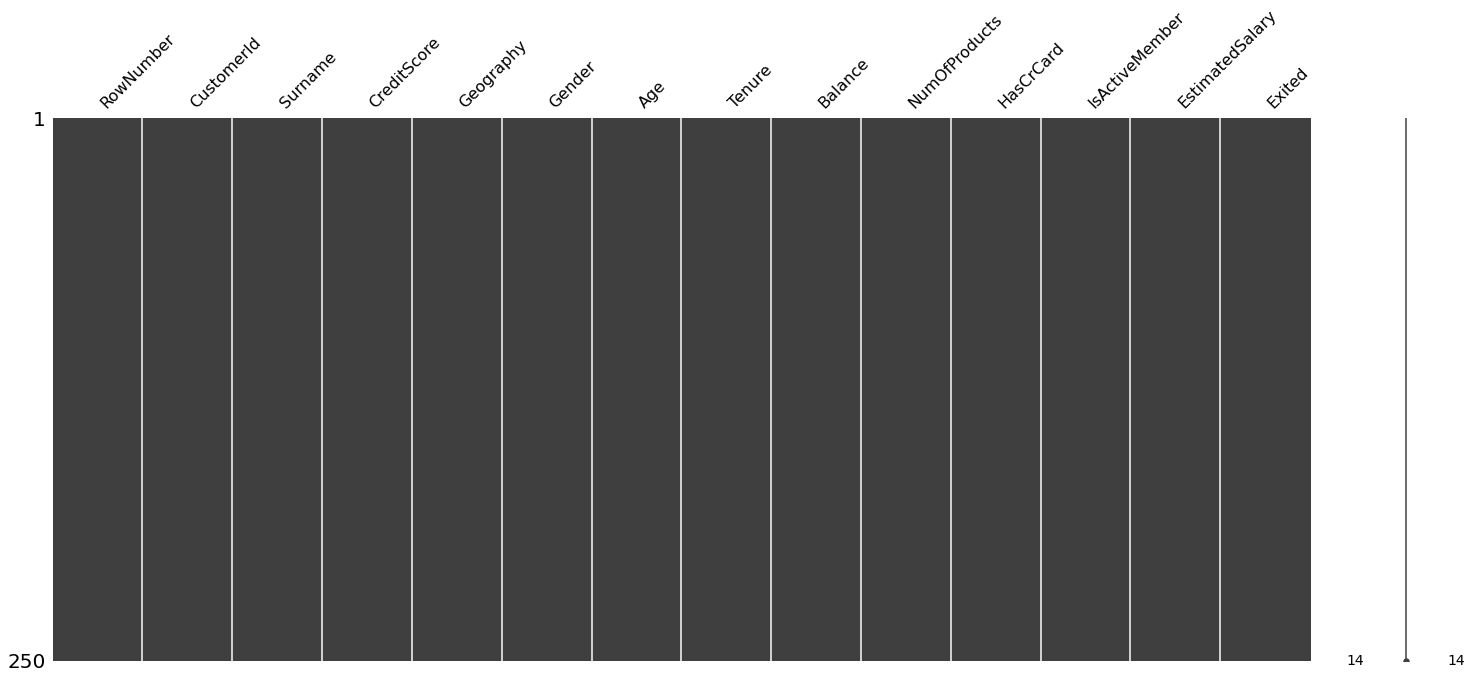

In [2479]:
# Diversas visualizações

Churn = Churn.replace("nan", np.nan)
import missingno as msno
%matplotlib inline
msno.matrix(Churn.sample(250))

In [2480]:
# Verificar a quantidade de registros nulos:

Churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [2481]:
# Dtypes condizentes

numerical_cols = ['RowNumber',	'CustomerId',	'CreditScore',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']
 
categorical_cols = ['Surname', 'Geography',	'Gender']
 
def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
 
to_type(Churn, numerical_cols, 'float')
to_type(Churn, categorical_cols, 'category')

In [2482]:
# Outliers

def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[Churn[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[Churn[col_name] > (media + intervalo), col_name] = np.nan
to_type(Churn, categorical_cols, 'category')

In [2483]:
# substituir valores faltantes pela moda

for column in ['Surname', 'Geography', 'Gender']:
    Churn[column].fillna(Churn[column].mode()[0], inplace=True)

In [2484]:
# Substituir valores pela mediana

for column in ['Age',	'Tenure',	'Balance', 'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']:
    Churn[column].fillna(Churn[column].mean(), inplace=True)

In [2485]:
# Exclusão dos dados faltantes

Churn.dropna(inplace=True)

In [2486]:
Churn = Churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [2487]:
Churn_num = pd.get_dummies(Churn)
Churn_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


### 3.3 Seleção de atributos

In [2488]:
X = Churn.drop(['Exited'], axis=1)
y = Churn['Exited']

In [2489]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [2490]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


### 3.4 Construção do modelo

In [2491]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [2493]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [2494]:
lr = LogisticRegression(random_state = 0)
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

In [2495]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [2496]:
pred_svc = svc.predict(X_test)
pred_svc

array([0., 0., 0., ..., 0., 0., 0.])

### 3.5 Avaliação do modelo

In [2497]:
# Acuracia Random Forest

rfc.score(X_test, y_test)

0.8626666666666667

In [2498]:
# AUC

y_pred = rfc.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6978987117844507

In [2499]:
# Regressão Logística 

print('Acurácia média:', scores.mean())

Acurácia média: 0.7907


In [2500]:
# Acuracia SVC

svc.score(X_test, y_test)

0.8053333333333333

### 3.4 Otimização do modelo

 ***Random Forest = 86%, AUC = 70%, Regressão Logística = 79%, SVC = 81%***

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.